In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [3]:
data = pd.read_csv('data/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [4]:
data.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False
2012-10-19,45,98,760.01,False
2012-10-26,45,98,1076.80,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total weekly sales per store.

In [6]:
# Filter to store 1 sales and average over weeks
store1_sales = data[data.Store == 1][['Weekly_Sales']].resample('W').sum()
store1_sales.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


#### Plot the rolling_mean for `Weekly_Sales` with a window size of 3. What general trends do you observe?

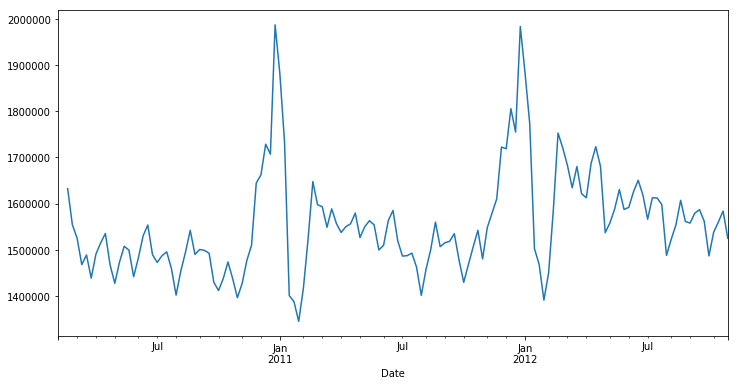

In [8]:
store1_sales['Weekly_Sales'].rolling(window=3).mean().plot(figsize=(12,6))

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [9]:
print('Autocorrelation 1: ', store1_sales['Weekly_Sales'].autocorr(1))
print('Autocorrelation 2: ', store1_sales['Weekly_Sales'].autocorr(2))
print('Autocorrelation 52: ', store1_sales['Weekly_Sales'].autocorr(52))

('Autocorrelation 1: ', 0.30215827941131262)
('Autocorrelation 2: ', 0.12741313055390102)
('Autocorrelation 52: ', 0.89537602947770101)


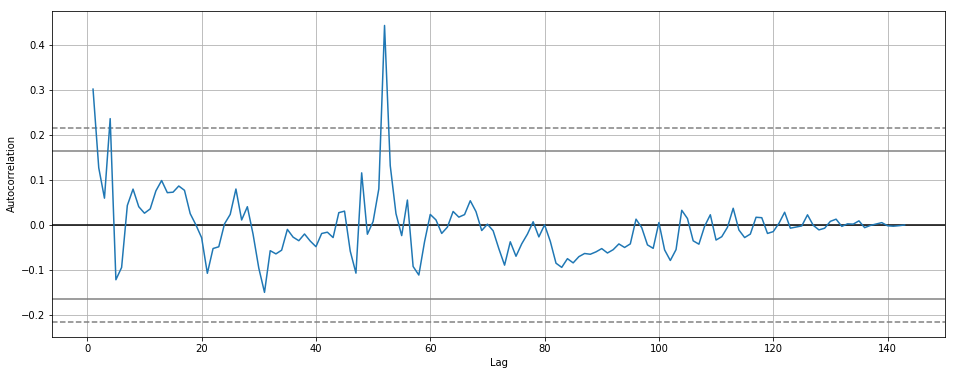

In [10]:
from pandas.plotting import autocorrelation_plot
fig, ax = plt.subplots(figsize=(16,6))
autocorrelation_plot(store1_sales['Weekly_Sales'], ax=ax)

/Users/kwanchongtan/anaconda/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


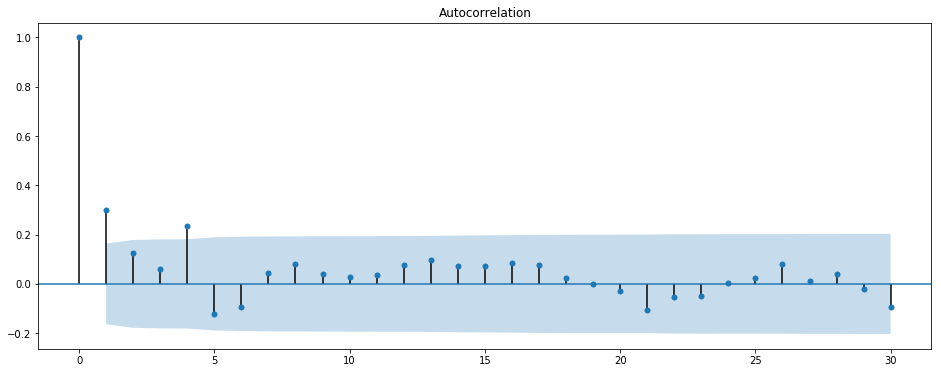

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(16,6))
plot_acf(store1_sales['Weekly_Sales'], lags=30, ax=ax)
plt.show()
# Components 1 and 2 seem particularly useful for autoregression, perhaps up to 4
# In the plot above notice, spike at around 52 - implying a yearly pattern as well
# No random spikes, probably not much use for a moving average model

#### Split the weekly sales data in a training and test set - using 75% of the data for training (hint: use Python array indices)

In [13]:
n = len(store1_sales.Weekly_Sales)

train = store1_sales.Weekly_Sales[:int(.75*n)]
test = store1_sales.Weekly_Sales[int(.75*n):]

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions 
- hint: use model.predict('start_date', 'end_date') to get the predictions

In [14]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29'
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 81839.338631623992)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood               -1434.663
Method:                       css-mle   S.D. of innovations         160916.939
Date:                Sat, 22 Jul 2017   AIC                           2875.327
Time:                        14:17:06   BIC                           2883.345
Sample:                    02-07-2010   HQIC                          2878.577
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06   2.26e+04     68.293      0.000     1.5e+06    1.59e+06
ar.L1.Weekly_Sales     0.3147      0.093      3.399      0.001       0.133       0.496
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1779           +0.0000j            3.1779            0.0000
-----------------------------------------------------------------------------
"""

#### Plot the residuals - where are their significant errors.

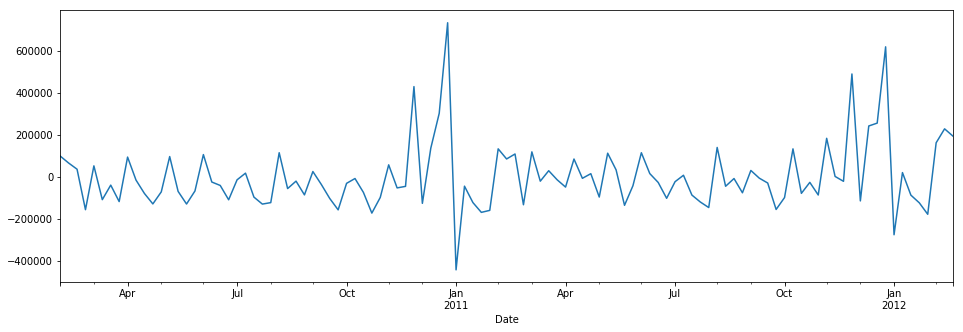

In [17]:
model.resid.plot(figsize=(16,5))

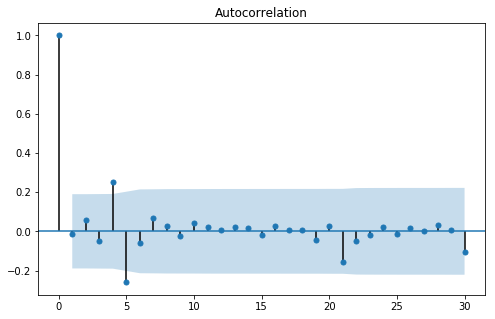

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
plot_acf(model.resid, lags=30, ax=ax)
plt.show()

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [19]:
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29'
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))

model.summary()

('Mean absolute error: ', 81203.239354419813)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Sat, 22 Jul 2017   AIC                           2876.963
Time:                        14:18:44   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06    2.4e+04     64.349      0.000     1.5e+06    1.59e+06
ar.L1.Weekly_Sales     0.2974      0.097      3.075      0.003       0.108       0.487
ar.L2.Weekly_Sales     0.0589      0.098      0.603      0.548      -0.132       0.250
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3080           +0.0000j            2.3080            0.0000
AR.2           -7.3588           +0.0000j            7.3588            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
model = sm.tsa.ARIMA(train, (2, 0, 2)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29'
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))

model.summary()

('Mean absolute error: ', 80501.576174819202)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 2)   Log Likelihood               -1425.781
Method:                       css-mle   S.D. of innovations         144122.694
Date:                Sat, 22 Jul 2017   AIC                           2863.563
Time:                        14:18:58   BIC                           2879.600
Sample:                    02-07-2010   HQIC                          2870.064
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06   1.92e+04     80.322      0.000    1.51e+06    1.58e+06
ar.L1.Weekly_Sales    -1.0398      0.090    -11.583      0.000      -1.216      -0.864
ar.L2.Weekly_Sales    -0.4701      0.087     -5.380      0.000      -0.641      -0.299
ma.L1.Weekly_Sales     1.4690      0.058     25.326      0.000       1.355       1.583
ma.L2.Weekly_Sales     0.9996      0.074     13.534      0.000       0.855       1.144
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1059           -0.9509j            1.4585           -0.3870
AR.2           -1.1059           +0.9509j            1.4585            0.3870
MA.1           -0.7348           -0.6786j            1.0002           -0.3813
MA.2           -0.7348           +0.6786j            1.0002            0.3813
-----------------------------------------------------------------------------
"""

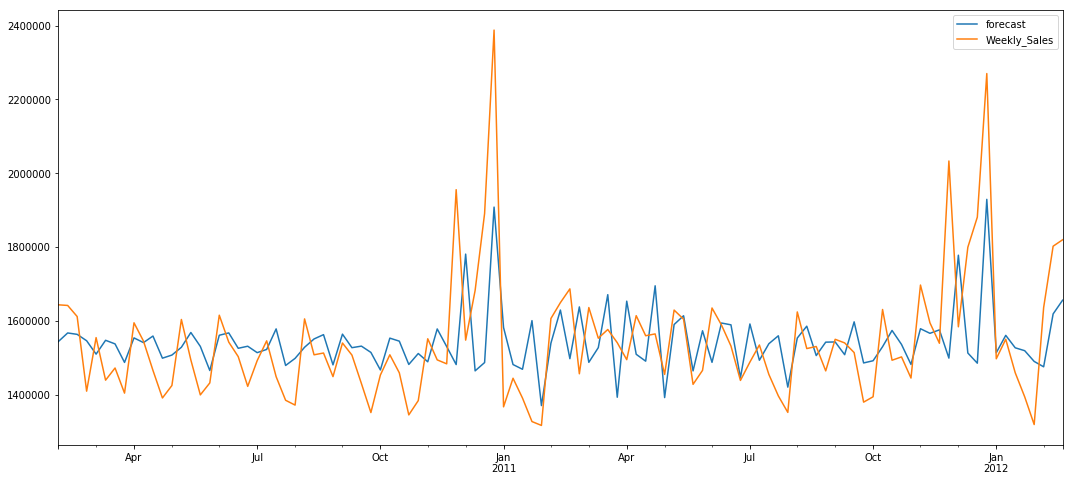

In [22]:
fig, ax = plt.subplots(figsize=(18,8))
model.plot_predict(ax=ax)
plt.show()

In [23]:
from fbprophet import Prophet

In [24]:
m = Prophet()

In [25]:
store1_sales["y"] = store1_sales.Weekly_Sales
store1_sales["ds"] = store1_sales.index

In [26]:
train_prophet = store1_sales[:int(.75*n)]

In [27]:
m.fit(train_prophet)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=36, freq="W")

In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
138,2012-09-30,1.532947e+06,1.391099e+06,1.686505e+06
139,2012-10-07,1.564905e+06,1.415905e+06,1.709160e+06
140,2012-10-14,1.563508e+06,1.418342e+06,1.696765e+06
141,2012-10-21,1.534159e+06,1.386665e+06,1.681866e+06
142,2012-10-28,1.525743e+06,1.371254e+06,1.683612e+06


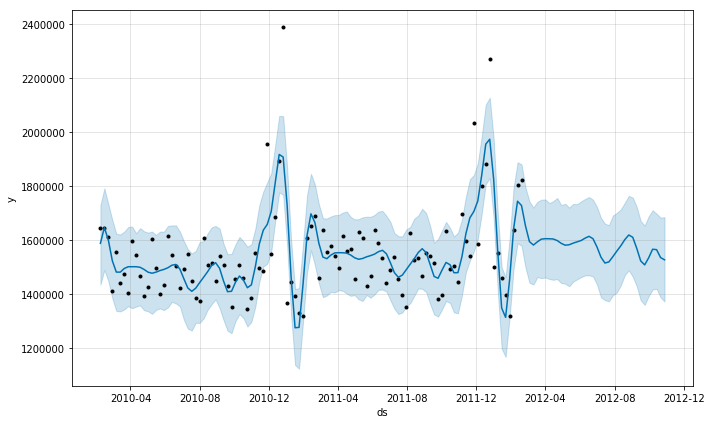

In [30]:
m.plot(forecast);

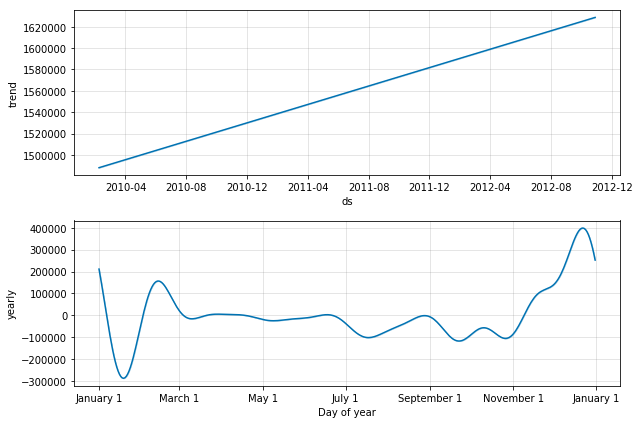

In [31]:
m.plot_components(forecast);